In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

2023-09-28 05:33:03.964127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 05:33:04.003426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 05:33:04.004227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 05:33:04.691736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
titanic = pd.read_csv("datasets/titanic.csv")

predictors = titanic.drop(["survived", "age_was_missing"], axis=1).values
target = to_categorical(titanic.survived)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
print(n_cols)
print(target[:5])

9
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


### Complie and fit the model with `loss='categorical_crossentropy'` for classification


In [3]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation="relu", input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
model.fit(predictors, target, epochs=20)

# Calculate predictions: predictions
predictions = model.predict(predictors)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# Print Accuracy
loss, accuracy = model.evaluate(predictors, target)
print("Accuracy:", accuracy)

Epoch 1/20


2023-09-28 05:33:07.088979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


28/28 [==============================] - 0s 970us/step - loss: 1.8902 - accuracy: 0.5937
Epoch 2/20
28/28 [==============================] - 0s 1ms/step - loss: 0.8862 - accuracy: 0.6442
Epoch 3/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6622
Epoch 4/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.6667
Epoch 5/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6790
Epoch 6/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.6925
Epoch 7/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7037
Epoch 8/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.7071
Epoch 9/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.6947
Epoch 10/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7071
Epoch 11/20
28/28 [=========

## Model Evaluation


In [10]:
eval = model.evaluate(predictors, target)
print(eval)

28/28 [==============================] - 0s 866us/step - loss: 0.5789 - accuracy: 0.7217
[0.5789068937301636, 0.7216610312461853]


## Save & Load


In [5]:
model.save("Saved/titanic_model.h5")

my_model = load_model("Saved/titanic_model.h5")
my_model.summary()

pred = my_model.predict(predictors)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 386 (1.51 KB)
Trainable params: 386 (1.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
28/28 [==============================] - 0s 646us/step


/home/youssef/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Compare Models


[0.7150837779045105, 0.7262569665908813, 0.7206704020500183, 0.7206704020500183, 0.7206704020500183, 0.7039105892181396, 0.7094972133636475, 0.7039105892181396, 0.7262569665908813, 0.37988826632499695, 0.7262569665908813]
[0.6033519506454468, 0.6815642714500427, 0.6983240246772766, 0.6424580812454224, 0.7150837779045105, 0.7262569665908813, 0.6424580812454224, 0.6983240246772766, 0.659217894077301]
[0.7150837779045105, 0.35754188895225525, 0.7206704020500183, 0.7262569665908813, 0.7262569665908813, 0.7094972133636475, 0.7150837779045105, 0.7150837779045105, 0.7150837779045105]
final_accuracy1 =  0.7262569665908813
final_accuracy2 =  0.659217894077301
final_accuracy3 =  0.7150837779045105


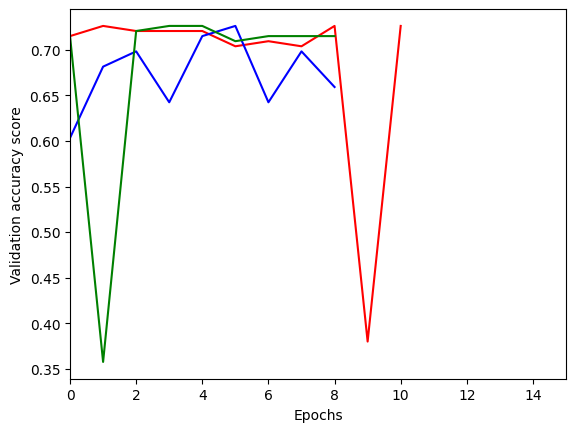

In [6]:
early_stopping = EarlyStopping(patience=3)

# Model 1
model1 = Sequential()

model1.add(Dense(10, activation="relu", input_shape=(n_cols,)))

model1.add(Dense(10, activation="relu"))

model1.add(Dense(2, activation="softmax"))

model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model1_training = model1.fit(
    predictors,
    target,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=False,
)


# Model 2 same as model 1 but with more nodes
model2 = Sequential()

model2.add(Dense(100, activation="relu", input_shape=(n_cols,)))

model2.add(Dense(50, activation="relu"))

model2.add(Dense(2, activation="softmax"))

model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model2_training = model2.fit(
    predictors,
    target,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=False,
)


# Model 3 same as model 1 but with more layers
model3 = Sequential()

model3.add(Dense(10, activation="relu", input_shape=(n_cols,)))

model3.add(Dense(10, activation="relu"))

model3.add(Dense(10, activation="relu"))

model3.add(Dense(2, activation="softmax"))

model3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model3_training = model3.fit(
    predictors,
    target,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=False,
)


print(model1_training.history["val_accuracy"])
print(model2_training.history["val_accuracy"])
print(model3_training.history["val_accuracy"])

print("final_accuracy1 = ", model1_training.history["val_accuracy"][-1])
print("final_accuracy2 = ", model2_training.history["val_accuracy"][-1])
print("final_accuracy3 = ", model3_training.history["val_accuracy"][-1])

# Plot the Comparasion
plt.plot(
    model1_training.history["val_accuracy"],
    "r",
    model2_training.history["val_accuracy"],
    "b",
    model3_training.history["val_accuracy"],
    "g",
)
plt.xlabel("Epochs")
plt.xlim(0, 15)
plt.ylabel("Validation accuracy score")
plt.show()